In [54]:
import os
import pandas as pd

import models
import ch_pen as chp
import ch_metaobjects as chm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("husl")

root_path   = os.environ['COOPERHEWITT_ROOT']
export_path = root_path + '/export/'

In [49]:
pen  = chp.Pen()
meta = chm.MetaObjectStore() 
df_features = pd.read_pickle(export_path + 'penmeta_features.pkl')

In [52]:
metrics = pen.calc_metrics(meta.df_objects)
metrics['n_tags_via_bursty'] = df_features['is_bursty'].sum()
metrics

{'n_afterhrs_tags': 407081,
 'n_avgdaily_tags': 32,
 'n_avgdailyhr_tags': 17,
 'n_during_exhibition_tags': 1700976,
 'n_nonexhibition_tags': 1898759,
 'n_objects_meta_delta': 3895,
 'n_tags': 3599735,
 'n_tags_via_bursty': 331044,
 'n_unique_bundles': 111467,
 'n_unique_wallobjects': 7783,
 'n_visitor_objects_tagged': 115737,
 'n_wall_objects_tagged': 3483998,
 'nobs_meta_delta': 3192654}

In [50]:
pen.create_bundle_daily_sequences()
anomaly_detections = pen.df_bundle_sequences.apply(lambda x: models.anomaly_detector(x))
print 'num_bursty_visitors: {0}'.format(anomaly_detections.n_anomalies.sum())

num_bursty_visitors: 14455


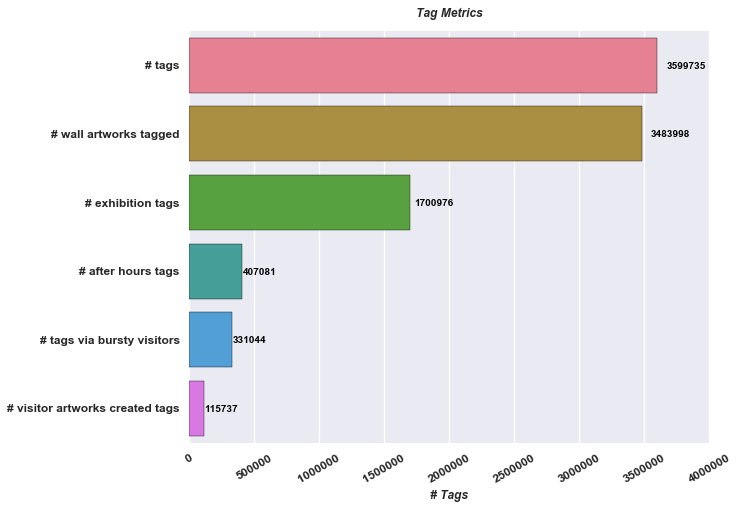

In [61]:
metrics_frame = pd.DataFrame.from_dict(metrics, orient='index')
metrics_frame.columns = ['measurement']
cols = ['n_tags', 'n_wall_objects_tagged', 'n_visitor_objects_tagged', 'n_during_exhibition_tags',
        'n_afterhrs_tags', 'n_tags_via_bursty']
submetrics_frame = metrics_frame[metrics_frame.index.isin(cols)]
submetrics_frame = submetrics_frame.sort_values(by='measurement', ascending=False)
submetrics_frame = submetrics_frame.rename(index= {
    'n_tags': '# tags', 'n_wall_objects_tagged': '# wall artworks tagged',    
    'n_visitor_objects_tagged': '# visitor artworks created tags', 'n_during_exhibition_tags': '# exhibition tags',
    'n_afterhrs_tags': '# after hours tags', 'n_tags_via_bursty': '# tags via bursty visitors'})
sns.barplot(submetrics_frame['measurement'],  list(submetrics_frame.index), orient='h')
plt.xlabel("# Tags", fontweight='bold', fontsize=12, style='italic')
plt.title("Tag Metrics", fontweight='bold', fontsize=12, style='italic')
plt.gca().title.set_position([.5, 1.025])
for item in plt.gca().get_xticklabels(): 
    item.set_rotation(30)
    item.set_fontsize(12)
    item.set_fontweight('bold')
for item in plt.gca().get_yticklabels(): 
    item.set_fontsize(12)
    item.set_fontweight('bold')
             
rects = plt.gca().patches
for rect in rects:
    width  = rect.get_width()
    height = rect.get_height()
    xloc=width * 1.02
    yloc=rect.get_y() + rect.get_height()/2.0
    plt.gca().text(xloc, yloc, int(width), verticalalignment='center', color='black', weight='bold')

plt.tight_layout()
plt.savefig(root_path + "/plots/metrics.png", dpi=100)    